In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [ ]:
deliveries = pd.read_csv('/content/drive/MyDrive/deliveries_updated_mens_ipl.csv')
matches = pd.read_csv('/content/drive/MyDrive/matches_updated_mens_ipl.csv')

#Using Batting Analysis Code Snippets

In [ ]:
#Strike Rate
def calcSR (runs,balls):
  return 100 * (runs / balls)

In [ ]:
#Runs per Innings
def calcRPI (runs,innings):
  return runs / innings

In [ ]:
#Balls per Dismissal
def calcBPD (balls,dismissals):
  if dismissals > 0:
    return balls/dismissals
  else:
    return balls/1

In [ ]:
def Phase (over):
  if over < 6:
    return 'Powerplay'
  elif over <= 15:
    return 'Middle'
  else:
    return 'Death'

In [ ]:
#Balls per Boundary
def calcBPB (balls,boundary):
  if boundary > 0:
    return balls/boundary
  else:
    return balls/1

In [ ]:
deliveries['phase'] = deliveries['over'].apply(lambda x: Phase(x))

In [ ]:
def playerAnalysis (custDF,custPhase):

  custDF = custDF[custDF.phase == custPhase]
  custDF.reset_index(inplace = True,drop = True)

  custDF['isDot'] = custDF['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
  custDF['isSingle'] = custDF['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
  custDF['isDouble'] = custDF['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
  custDF['isTriple'] = custDF['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
  custDF['isFour'] = custDF['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
  custDF['isSix'] = custDF['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

  Runs = pd.DataFrame(custDF.groupby(['batsman','matchId'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'Runs'})
  Innings  = pd.DataFrame(custDF.groupby(['batsman'])['matchId'].apply(lambda x : len(list(np.unique(x)))).reset_index().rename(columns={'matchId':'Innings'}))
  Balls = pd.DataFrame(custDF.groupby(['batsman'])['matchId'].count().reset_index().rename(columns={'matchId':'Balls'}))
  Dismissals = pd.DataFrame(custDF.groupby(['batsman'])['player_dismissed'].count().reset_index().rename(columns={'player_dismissed':'Dismissals'}))

  Dots = pd.DataFrame(custDF.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'Dots'})
  Singles = pd.DataFrame(custDF.groupby(['batsman'])['isSingle'].sum()).reset_index().rename(columns = {'isSingle':'Singles'})
  Doubles = pd.DataFrame(custDF.groupby(['batsman'])['isDouble'].sum()).reset_index().rename(columns = {'isDouble':'Doubles'})
  Triples = pd.DataFrame(custDF.groupby(['batsman'])['isTriple'].sum()).reset_index().rename(columns = {'isTriple':'Triples'})
  Fours = pd.DataFrame(custDF.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'Fours'})
  Sixes = pd.DataFrame(custDF.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'Sixes'})

  newcustdF = pd.merge(Innings, Runs, on = 'batsman').merge(Balls, on = 'batsman').merge(Dismissals, on = 'batsman').merge(Dots, on = 'batsman').merge(Singles, on = 'batsman').merge(Doubles, on = 'batsman').merge(Triples, on = 'batsman').merge(Fours, on = 'batsman').merge(Sixes, on = 'batsman')

  newcustdF['SR'] = newcustdF.apply(lambda x : calcSR(x['Runs'], x['Balls']), axis = 1)
  newcustdF['RPI'] = newcustdF.apply(lambda x : calcRPI(x['Runs'], x['Innings']), axis = 1)
  newcustdF['BPB'] = newcustdF.apply(lambda x : calcBPB(x['Balls'], (x['Fours'] + x['Sixes'])), axis = 1)
  newcustdF['BPD'] = newcustdF.apply(lambda x : calcBPD(x['Balls'], x['Dismissals']), axis = 1)
  newcustdF['dot_percentage'] = newcustdF.apply(lambda x: x['Dots']/x['Balls'], axis = 1)


  return newcustdF


In [ ]:
PP_dF = playerAnalysis(deliveries,'Powerplay')

In [ ]:
PP_dF = PP_dF[PP_dF.Innings >= 20]
PP_dF.reset_index(inplace = True,drop = True)

In [ ]:
PP_dF.head()

,batsman,Innings,Runs,Balls,Dismissals,Dots,Singles,Doubles,Triples,Fours,Sixes,SR,RPI,BPB,BPD,dot_percentage
0,AB de Villiers,81,741,630,22,319,164,24,3,100,20,117.619048,9.148148,5.250000,28.636364,0.506349
1,AC Gilchrist,80,1385,1080,48,556,244,37,3,191,49,128.240741,17.312500,4.500000,22.500000,0.514815
2,AJ Finch,71,911,826,40,445,194,39,3,120,25,110.290557,12.830986,5.696552,20.650000,0.538741
3,AM Rahane,145,2174,1897,66,904,570,82,12,285,44,114.602003,14.993103,5.765957,28.742424,0.476542
4,AT Rayudu,82,777,750,23,395,215,23,0,93,24,103.600000,9.475610,6.410256,32.608696,0.526667


#Find best pinch hitters in PP using Satty scale

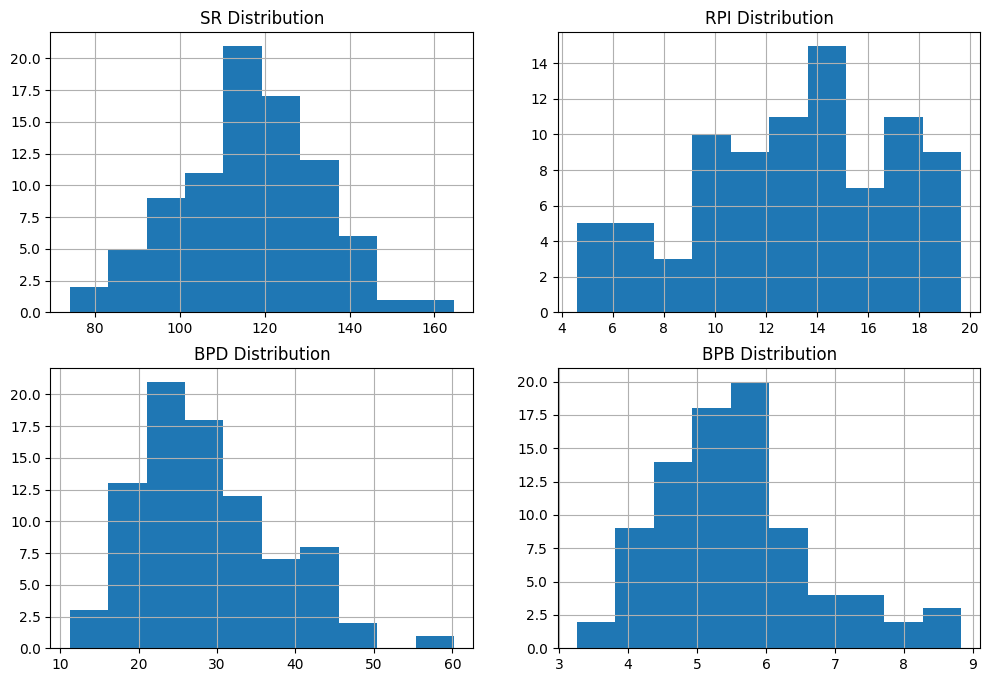

In [ ]:
plt.figure(figsize = (12,8))

plt.subplot(221)
PP_dF.SR.hist()
plt.title('SR Distribution')

plt.subplot(222)
PP_dF.RPI.hist()
plt.title('RPI Distribution')

plt.subplot(223)
PP_dF.BPD.hist()
plt.title('BPD Distribution')

plt.subplot(224)
PP_dF.BPB.hist()
plt.title('BPB Distribution')

plt.show()

Pair-wise Matrix

| Parameters |  SR  | RPI  | BPD | Dot % |
|------------|------|------|-----|-------|
| SR         | 1    | 4    | 2   | 1     |
| RPI        | 0.25 | 1    | 4   | 1     |
| BPD        | 0.50 | 0.25 | 1   | 0.5   |
| Dot %      | 1    | 1    | 2   | 1     |
| SUM        | 2.75 | 6.25 | 9   | 3.50  |

Normalised Matrix

| Parameters |  SR  | RPI  | BPD  | Dot % |
|------------|------|------|------|-------|
| SR         | 0.36 | 0.64 | 0.22 | 0.29  |
| RPI        | 0.09 | 0.16 | 0.44 | 0.29  |
| BPD        | 0.50 | 0.04 | 0.11 | 0.14  |
| Dot %      | 0.18 | 0.16 | 0.22 | 0.29  |

Criteria Weights

| Parameter | Criteria Weights |
|-----------|------------------|
| SR        | 0.38             |
| RPI       | 0.25             |
| BPD       | 0.12             |
| Dot %     | 0.26             |

In [ ]:
wt_sr, wt_rpi, wt_bpd, wt_bpb = 0.38, 0.25, 0.12, 0.26

In [ ]:
PP_dF['cal_SR'] = PP_dF['SR'].apply(lambda x: x*x)
PP_dF['cal_RPI'] = PP_dF['RPI'].apply(lambda x: x*x)
PP_dF['cal_BPD'] = PP_dF['BPD'].apply(lambda x: x*x)
PP_dF['cal_dot_perc'] = PP_dF['dot_percentage'].apply(lambda x: x*x)

PP_dF.head(1)

,batsman,Innings,Runs,Balls,Dismissals,Dots,Singles,Doubles,Triples,Fours,Sixes,SR,RPI,BPB,BPD,dot_percentage,cal_SR,cal_RPI,cal_BPD,cal_dot_perc
0,AB de Villiers,81,741,630,22,319,164,24,3,100,20,117.619048,9.148148,5.25,28.636364,0.506349,13834.240363,83.688615,820.041322,0.25639


In [ ]:
sq_sr, sq_rpi, sq_bpd, sq_dot_per = np.sqrt(PP_dF[['cal_SR','cal_RPI', 'cal_BPD', 'cal_dot_perc']].sum(axis = 0))

In [ ]:
sq_sr, sq_rpi, sq_bpd, sq_dot_per

(1081.2915440049446, 126.67467404825024, 276.5527818744789, 4.79651442868589)

In [ ]:
PP_dF['cal_SR'] = PP_dF['cal_SR'].apply(lambda x: x/sq_sr)
PP_dF['cal_RPI'] = PP_dF['cal_RPI'].apply(lambda x: x/sq_rpi)
PP_dF['cal_BPD'] = PP_dF['cal_BPD'].apply(lambda x: x/sq_bpd)
PP_dF['cal_dot_perc'] = PP_dF['cal_dot_perc'].apply(lambda x: x/sq_dot_per)

PP_dF.head(1)

,batsman,Innings,Runs,Balls,Dismissals,Dots,Singles,Doubles,Triples,Fours,Sixes,SR,RPI,BPB,BPD,dot_percentage,cal_SR,cal_RPI,cal_BPD,cal_dot_perc
0,AB de Villiers,81,741,630,22,319,164,24,3,100,20,117.619048,9.148148,5.25,28.636364,0.506349,12.794182,0.660658,2.965225,0.053453


In [ ]:
PP_dF['cal_SR'] = PP_dF['cal_SR'].apply(lambda x: x*wt_sr)
PP_dF['cal_RPI'] = PP_dF['cal_RPI'].apply(lambda x: x*wt_rpi)
PP_dF['cal_BPD'] = PP_dF['cal_BPD'].apply(lambda x: x*wt_bpd)
PP_dF['cal_dot_perc'] = PP_dF['cal_dot_perc'].apply(lambda x: x*wt_bpb)

PP_dF.head(1)

,batsman,Innings,Runs,Balls,Dismissals,Dots,Singles,Doubles,Triples,Fours,Sixes,SR,RPI,BPB,BPD,dot_percentage,cal_SR,cal_RPI,cal_BPD,cal_dot_perc
0,AB de Villiers,81,741,630,22,319,164,24,3,100,20,117.619048,9.148148,5.25,28.636364,0.506349,4.861789,0.165164,0.355827,0.013898


In [ ]:
best_sr, worst_sr = max(PP_dF['cal_SR']), min(PP_dF['cal_SR'])
best_rpi, worst_rpi = max(PP_dF['cal_RPI']), min(PP_dF['cal_RPI'])
best_bpd, worst_bpd = max(PP_dF['cal_BPD']), min(PP_dF['cal_BPD'])
best_dot_perc, worst_dot_perc = min(PP_dF['cal_dot_perc']), max(PP_dF['cal_dot_perc'])

In [ ]:
best_sr, worst_sr,best_rpi, worst_rpi,best_bpd, worst_bpd,best_dot_perc, worst_dot_perc

(9.521850321263665,
 1.9235937249825292,
 0.7619309001951506,
 0.04176051795471796,
 1.572520070318383,
 0.05464632281099908,
 0.00971679027735935,
 0.024906792548108157)

In [ ]:
PP_dF['my_best_SR'] = PP_dF['cal_SR'].apply(lambda x: (x-best_sr)*(x-best_sr))
PP_dF['my_best_RPI'] = PP_dF['cal_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi))
PP_dF['my_best_BPD'] = PP_dF['cal_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd))
PP_dF['my_best_dot_perc'] = PP_dF['cal_dot_perc'].apply(lambda x: (x-best_dot_perc)*(x-best_dot_perc))

PP_dF.head(1)

,batsman,Innings,Runs,Balls,Dismissals,Dots,Singles,Doubles,Triples,Fours,Sixes,SR,RPI,BPB,BPD,dot_percentage,cal_SR,cal_RPI,cal_BPD,cal_dot_perc,my_best_SR,my_best_RPI,my_best_BPD,my_best_dot_perc
0,AB de Villiers,81,741,630,22,319,164,24,3,100,20,117.619048,9.148148,5.25,28.636364,0.506349,4.861789,0.165164,0.355827,0.013898,21.716171,0.35613,1.480342,0.000017


In [ ]:
PP_dF['my_best_sqrt'] = PP_dF.apply(lambda x: x['my_best_SR'] + x['my_best_RPI'] + x['my_best_BPD'] + x['my_best_dot_perc'], axis = 1)

PP_dF.head(1)

,batsman,Innings,Runs,Balls,Dismissals,Dots,Singles,Doubles,Triples,Fours,Sixes,SR,RPI,BPB,BPD,dot_percentage,cal_SR,cal_RPI,cal_BPD,cal_dot_perc,my_best_SR,my_best_RPI,my_best_BPD,my_best_dot_perc,my_best_sqrt
0,AB de Villiers,81,741,630,22,319,164,24,3,100,20,117.619048,9.148148,5.25,28.636364,0.506349,4.861789,0.165164,0.355827,0.013898,21.716171,0.35613,1.480342,0.000017,23.552661


In [ ]:
PP_dF['my_worst_SR'] = PP_dF['cal_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr))
PP_dF['my_worst_RPI'] = PP_dF['cal_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi))
PP_dF['my_worst_BPD'] = PP_dF['cal_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd))
PP_dF['my_worst_dot_perc'] = PP_dF['cal_dot_perc'].apply(lambda x: (x-worst_dot_perc)*(x-worst_dot_perc))

PP_dF.head(1)

,batsman,Innings,Runs,Balls,Dismissals,Dots,Singles,Doubles,Triples,Fours,Sixes,SR,RPI,BPB,BPD,dot_percentage,cal_SR,cal_RPI,cal_BPD,cal_dot_perc,my_best_SR,my_best_RPI,my_best_BPD,my_best_dot_perc,my_best_sqrt,my_worst_SR,my_worst_RPI,my_worst_BPD,my_worst_dot_perc
0,AB de Villiers,81,741,630,22,319,164,24,3,100,20,117.619048,9.148148,5.25,28.636364,0.506349,4.861789,0.165164,0.355827,0.013898,21.716171,0.35613,1.480342,0.000017,23.552661,8.632991,0.015229,0.09071,0.000121


In [ ]:
PP_dF['my_worst_sqrt'] = PP_dF.apply(lambda x: x['my_worst_SR'] + x['my_worst_RPI'] + x['my_worst_BPD'] + x['my_worst_dot_perc'], axis = 1)

PP_dF.head(1)

,batsman,Innings,Runs,Balls,Dismissals,Dots,Singles,Doubles,Triples,Fours,Sixes,SR,RPI,BPB,BPD,dot_percentage,cal_SR,cal_RPI,cal_BPD,cal_dot_perc,my_best_SR,my_best_RPI,my_best_BPD,my_best_dot_perc,my_best_sqrt,my_worst_SR,my_worst_RPI,my_worst_BPD,my_worst_dot_perc,my_worst_sqrt
0,AB de Villiers,81,741,630,22,319,164,24,3,100,20,117.619048,9.148148,5.25,28.636364,0.506349,4.861789,0.165164,0.355827,0.013898,21.716171,0.35613,1.480342,0.000017,23.552661,8.632991,0.015229,0.09071,0.000121,8.739051


In [ ]:
PP_dF['impactScore'] = PP_dF.apply(lambda x: x['my_worst_sqrt']/(x['my_worst_sqrt'] + x['my_best_sqrt']), axis = 1)

PP_dF.head()

,batsman,Innings,Runs,Balls,Dismissals,Dots,Singles,Doubles,Triples,Fours,Sixes,SR,RPI,BPB,BPD,dot_percentage,cal_SR,cal_RPI,cal_BPD,cal_dot_perc,my_best_SR,my_best_RPI,my_best_BPD,my_best_dot_perc,my_best_sqrt,my_worst_SR,my_worst_RPI,my_worst_BPD,my_worst_dot_perc,my_worst_sqrt,impactScore
0,AB de Villiers,81,741,630,22,319,164,24,3,100,20,117.619048,9.148148,5.250000,28.636364,0.506349,4.861789,0.165164,0.355827,0.013898,21.716171,0.356130,1.480342,0.000017,23.552661,8.632991,0.015229,0.090710,0.000121,8.739051,0.270628
1,AC Gilchrist,80,1385,1080,48,556,244,37,3,191,49,128.240741,17.312500,4.500000,22.500000,0.514815,5.779534,0.591520,0.219669,0.014366,14.004931,0.029040,1.830207,0.000022,15.864199,14.868276,0.302236,0.027232,0.000111,15.197855,0.489274
2,AJ Finch,71,911,826,40,445,194,39,3,120,25,110.290557,12.830986,5.696552,20.650000,0.538741,4.274816,0.324915,0.185031,0.015733,27.531367,0.190983,1.925127,0.000036,29.647513,5.528247,0.080177,0.017000,0.000084,5.625508,0.159485
3,AM Rahane,145,2174,1897,66,904,570,82,12,285,44,114.602003,14.993103,5.765957,28.742424,0.476542,4.615569,0.443643,0.358468,0.012310,24.071601,0.101307,1.473923,0.000007,25.646838,7.246729,0.161509,0.092307,0.000159,7.500704,0.226282
4,AT Rayudu,82,777,750,23,395,215,23,0,93,24,103.600000,9.475610,6.410256,32.608696,0.526667,3.771901,0.177200,0.461392,0.015036,33.061916,0.341910,1.234606,0.000028,34.638459,3.416240,0.018344,0.165442,0.000097,3.600124,0.094149


In [ ]:
PP_dF[['batsman','Innings', 'Runs','SR','RPI','BPD', 'dot_percentage','BPB', 'impactScore']].sort_values(['impactScore'], ascending = False).reset_index(drop = True).head(15)

,batsman,Innings,Runs,SR,RPI,BPD,dot_percentage,BPB,impactScore
0,SP Narine,44,665,164.603960,15.113636,11.222222,0.504950,3.258065,0.960188
1,YBK Jaiswal,37,727,148.367347,19.648649,28.823529,0.493878,3.684211,0.880726
2,JM Bairstow,36,695,142.710472,19.305556,30.437500,0.474333,4.127119,0.800845
3,CA Lynn,40,779,140.867993,19.475000,32.529412,0.490054,4.066176,0.771897
4,E Lewis,22,420,140.939597,19.090909,22.923077,0.486577,4.257143,0.759218
5,PP Shaw,71,1207,141.004673,17.000000,18.608696,0.442757,4.216749,0.753478
6,YK Pathan,33,361,141.015625,10.939394,21.333333,0.488281,4.063492,0.749657
7,JC Buttler,76,1415,136.979671,18.618421,30.382353,0.497580,4.251029,0.691876
8,V Sehwag,103,1593,137.327586,15.466019,19.333333,0.471552,4.202899,0.681161
9,GJ Maxwell,44,433,137.460317,9.840909,17.500000,0.482540,4.200000,0.675511


Conclusions :

KKR's decision to open with Sunil Narine and Chris Lynn had been exceptional results as both started firing from ball one which effected in this list as both are in top 5.

Yashavi Jaiswal has been promising talent and can be seen as future generation talent due to his consistency and hard-striking.

Yusuf Pathan was way ahead of his time with respect to striking.